# <center> TP5 / Volatilité : Méthode implicite </center>
<div>
    <center> RAZAFINDRAZAKA Henintsoa </center>
    <center> Wang James </center>
    <center> ____________</center>
    <center> ING5 BDA GR02 </center>
    <center> 22/12/2020 </center>
</div>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
import numpy as np
import math
import time

### Calcul de la volatilité implicite d'un call européen par dichotomie 

In [39]:
def volatiliteCallEu(S, E, r, T, C0):
    d1 = lambda sigma: (np.log(S/E) + (r + (sigma**2)/2) * T) / (sigma * np.sqrt(T))
    d2 = lambda sigma: d1(sigma) - sigma * np.sqrt(T)
    
    Ee = E * np.exp( -r * T)
    
    N1 = lambda sigma: 0.5 * math.erfc(-d1(sigma) / np.sqrt(2))
    N2 = lambda sigma: 0.5 * math.erfc(-d2(sigma) / np.sqrt(2))
    C = lambda sigma: S * N1(sigma) - Ee * N2(sigma)
    F = lambda sigma: C0 - C(sigma)
    
    a = 0.001
    a1 = a
    b = 10
    b1 = b
    d = (a+b)/2
    i = 0
    
    while i < 300:
        if F(a)*F(d)>0:
            a = d
        else:
            b = d
        d = (a+b)/2
        i = i+1

    plt.plot([a1, b1], [F(a1), F(b1)], label='S = 0')
    
    VOLATILITE_CALL_EU = d
    
    return VOLATILITE_CALL_EU

Volatilité d'un call européen =  9.567865883567528


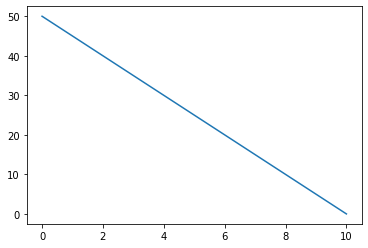

In [40]:
E = 100   # valeur du strike
r = 0.1   # taux sans risque
T = 3     # maturité
S = 50    # valeur finale du sous-jacent
C0 = 50

print("Volatilité d'un call européen = ", volatiliteCallEu(S,E,r,T,C0) )

### Calcul de la volatilité implicite d'un put européen par dichotomie 

In [41]:
def volatilitePutEu(S, E, r, T, C0):
    d1 = lambda sigma: (np.log(S/E) + (r + (sigma**2)/2) * T) / (sigma * np.sqrt(T))
    d2 = lambda sigma: d1(sigma) - sigma * np.sqrt(T)
    
    Ee = E * np.exp( -r * T)
    
    N1 = lambda sigma: 0.5 * math.erfc(d1(sigma) / np.sqrt(2))
    N2 = lambda sigma: 0.5 * math.erfc(d2(sigma) / np.sqrt(2))
    C = lambda sigma: Ee * ( N2(sigma) - S * N1(sigma) )
    F = lambda sigma: C0 - C(sigma)
    
    a = 0.001
    a1 = a
    b = 10
    b1 = b
    d = (a+b)/2
    i = 0
    
    while i < 300:
        if F(a)*F(d)>0:
            a = d
        else:
            b = d
        d = (a+b)/2
        i = i+1

    plt.plot([a1, b1], [F(a1), F(b1)], label='S = 0')
    
    VOLATILITE_PUT_EU = d
    
    return VOLATILITE_PUT_EU

Volatilité d'un put européen =  2.961667372348746


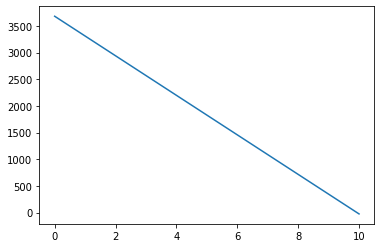

In [42]:
E = 100   # valeur du strike
r = 0.1   # taux sans risque
T = 3     # maturité
S = 50    # valeur finale du sous-jacent
C0 = 50

print("Volatilité d'un put européen = ", volatilitePutEu(S,E,r,T,C0) )